This is Caleb Kirkland's (cok18@msstate.edu) source code for Assignment 1 in CSE 4633

Question 2: Apply SVM to do classification on breast cancer dataset, and report the accuracy.

In [9]:
"""
Author: Caleb Kirkland 
Student Email: cok18@msstate.edu
CSE 4633 Assignment 1: Question 2
Goal: We want to use the sklearn SVM to do classification on a breast cancer data
set. These breast leasions can be classified as either malignant or benign. We 
need to predict the diagnosis of each sample and then report the accuracy of our 
prediction.
"""

import numpy as np

In [10]:
# Loads the breast cancer dataset and sets x, y to data and target respectively. 
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
x = cancer_data.data # Feature Matrix
y = cancer_data.target # Target Array

In [11]:
# Splitting the data into data to use to train and data to test against.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3) # Going with 7:3 ratio.
Y_train = np.reshape(Y_train, (-1,1))
Y_test = np.reshape(Y_test, (-1,1))

In [ ]:
# Setting up the model to learn using the SVM classifier.
# We want C to be around 1 to 3 and for the kernel to be linear
from sklearn.svm import SVC
svm_clf = SVC(kernel="linear", C=2, gamma='scale', probability=True, random_state = 0)
svm_clf.fit(X_train,Y_train)
Y_pred_svm = svm_clf.predict(X_test)
Y_prob_svm = svm_clf.predict_proba(X_test)[:,1]

In [13]:
# Using the sklearn metrics to generate an accuracy report of the SVM
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_test, Y_pred_svm)
print("SVM Accuracy: ", accuracy/0.01, "%")

SVM Accuracy:  92.39766081871345 %


Sources: 

https://datascience.stackexchange.com/a/22821

https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html

https://realpython.com/train-test-split-python-data/

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://randerson112358.medium.com/breast-cancer-detection-using-machine-learning-38820fe98982

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

https://scikit-learn.org/stable/modules/svm.html#classification


Question 3: Apply KMeans and Spectral Clustering on two circles data, and plot the results.

In [47]:
# Loading the dataset and generating the cirlcles.
# We want 500 points for our circles and .01 deviation of Gaussian noise
import sklearn.datasets as skl_data
import sklearn.datasets.samples_generator as skl_smpl
data, cluster_id = skl_smpl.make_blobs(n_samples=400, cluster_std=0.75, centers=4, random_state=1)

In [49]:
# Clustering with Kmeans. 
# Initializing the Kmeans module and telling it how many clusters to look for.
# Fitting the data and getting our prediction
import sklearn.cluster as skl_cluster
Kmean = skl_cluster.KMeans(n_clusters=4) 
Kmean.fit(data)
clusters = Kmean.predict(data)

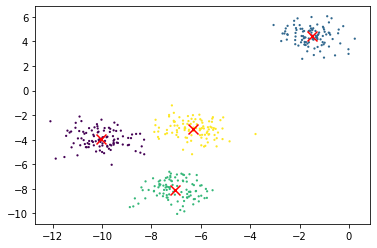

In [52]:
# Plotting the data and coloring it by cluster using cool matplotlib stuff
plt.scatter(data[:, 0], data[:, 1], s=5, linewidth=0, c=clusters)
for cluster_i, cluster_j in Kmean.cluster_centers_:
    plt.scatter(cluster_i, cluster_j, s=100, c='r', marker='x')

In [ ]:
# TODO: cluster with spectral clustering

Sources: 

https://medium.com/pursuitnotes/k-means-clustering-model-in-6-steps-with-python-35b532cfa8ad

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://www.youtube.com/watch?v=ikt0sny_ImY

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html